In [1]:
# Import packages

import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
import math

# Autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# Local modules
import inauguralproject


In [2]:
# Question 1

# Define parameters
m = 1 
v = 10 
epsilon = 0.3 
tau_0 = 0.4 
tau_1 = 0.1 
kappa = 0.4 
w = 1 # Initial assumption of wage rate

# Define income, utility and optimal labour functions
def income(l,w):
    return m + w*l - (tau_0*w*l + tau_1 * max([w*l - kappa,0]))

def utility(l,w):
    return math.log(income(l,w)) - v * ((l**(1+1/epsilon)) / (1 + 1/epsilon))

def optimizeutility(w):
    bounds = ((0,1),) # Labour must be between 0 and 1
    initial_guess = (1/2) # A feasible guess
    res = optimize.minimize(
        lambda l: -utility(l,w),initial_guess, # Max utility equals negative minimum utility
        method='SLSQP',bounds=bounds)
    
    print("The utility is", -res.fun)
    print("The labour is", res.x)
    print("The consumption is", income(res.x,w))
optimizeutility(1)


The utility is 0.17158308604731995
The labour is [0.39999639]
The consumption is [1.23999783]


<function matplotlib.pyplot.show(*args, **kw)>

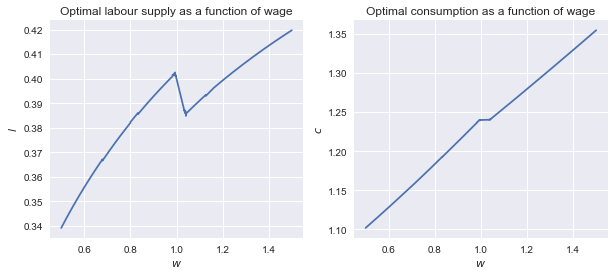

In [3]:
# Question 2

N = 10000 # Number of populations
w_vector = np.linspace(0.5,1.5,N)
l_vector = np.empty(N)
c_vector = np.empty(N)

# Setting up the wage vector
for i,w in enumerate(w_vector):
    bounds = ((0,1),) # Labour must be between 0 and 1
    initial_guess = (1/2) # A feasible guess
    res = optimize.minimize(
        lambda l: -utility(l,w),initial_guess, # Max utility equals negative minimum utility
        method='SLSQP',bounds=bounds)
    l_vector[i] = res.x
    c_vector[i] = income(l_vector[i],w)

# Setting up the plot
plt.style.use('seaborn')
fig = plt.figure(figsize=(10,4))

# Plotting graph 1
ax_left = fig.add_subplot(1,2,1)
ax_left.plot(w_vector,l_vector)
ax_left.set_title('Optimal labour supply as a function of wage')
ax_left.set_xlabel('$w$')
ax_left.set_ylabel('$l$')
ax_left.grid(True)

# Plotting graph 2
ax_right = fig.add_subplot(1,2,2)
ax_right.plot(w_vector, c_vector)
ax_right.set_title('Optimal consumption as a function of wage')
ax_right.set_xlabel('$w$')
ax_right.set_ylabel('$c$')
ax_right.grid(True)

plt.show


In [4]:
# Question 3

# Define tax revenue function
def tax_revenue(w_vector,l_vector,tau_0,tau_1,kappa):
    revenue = np.sum(tau_0*w_vector*l_vector + tau_1*np.max(w_vector*l_vector-kappa,0))
    return revenue

print("Total tax revenue is", tax_revenue(w_vector,l_vector,tau_0,tau_1,kappa))



Total tax revenue is 1806.4887606598818


In [5]:
# Question 4

# Redefining epsilon
epsilon = 0.1

N = 10000 # Number of population
w_vector = np.linspace(0.5,1.5,N)
l_vector_new = np.empty(N)
c_vector_new = np.empty(N)

# New labour and new consumption vector
l_vector_new = np.empty(N)
for i,w in enumerate(w_vector):
    bounds = ((0,1),) # Labour must be between 0 and 1
    initial_guess = (1/2) # A feasible guess
    res = optimize.minimize(
        lambda l: -utility(l,w),initial_guess, # Max utility equals negative minimum utility
        method='SLSQP',bounds=bounds)
    l_vector_new[i] = res.x
    c_vector_new[i] = income(l_vector_new[i],w)

# Define new tax revenue function
def tax_revenue_new(w_vector,l_vector_new,tau_0,tau_1,kappa, epsilon):
    revenue_new = np.sum(tau_0*w_vector*l_vector_new + tau_1*np.max(w_vector*l_vector_new-kappa,0))
    return revenue_new
    
print("Total tax revenue with new epsilon is", tax_revenue(w_vector,l_vector_new,tau_0,tau_1,kappa))


Total tax revenue with new epsilon is 3580.566225184207


In [6]:
# Question 5

# Define new income function for tax optimization with unknown parameters
def income_tax(x):
    w = x[0]
    l = x[1]
    tau_0 = x[2]
    tau_1 = x[3]
    kappa = x[4]
    return m + x[0]*x[1] - (x[2]*x[0]*x[1] + x[3] * max([x[0]*x[1] - x[4],0]))

# Define tax function for tax optimization with unknown parameters
def tax_fct(x):
    w = x[0]
    l = x[1]
    tau_0 = x[2]
    tau_1 = x[3]
    kappa = x[4]
    tax = np.sum(x[2]*x[0]*x[1] + x[3]*np.max(x[0]*x[1]-x[4],0))
    return -tax

# Multivariate optimizer with regards to unknown parameters
x0 = [1, 1, 1, 1, 1]
constraint = ({"type":"ineq","fun":income_tax})
bounds = ((0.5,1.5),(0,1),(0,1),(0,1),(0,1))

tax_res = optimize.minimize(tax_fct, x0, bounds=bounds,constraints=constraint, method='SLSQP')
print(tax_res.message)

# Matching results
w_opt = tax_res.x[0]
l_opt = tax_res.x[1]
tau_0_opt = tax_res.x[2]
tau_1_opt = tax_res.x[3]
kappa_opt = tax_res.x[4]
c_opt = income_tax(tax_res.x)
utility_opt_tax = utility(c_opt,l_opt)
tax_revenue_opt = tax_revenue(w_vector,l_vector,tau_0_opt,tau_1_opt,kappa_opt)

# Printing results
print("Standard labor income is", tau_0_opt)
print("Top bracket labor income is", tau_1_opt)
print("Cut-off for top labor income is", kappa_opt)
print("The total tax revenue is", tax_revenue_opt)

Optimization terminated successfully.
Standard labor income is 0.9259741409926628
Top bracket labor income is 0.9592130246396214
Cut-off for top labor income is 0.34171840876261966
The total tax revenue is 6411.445302185219
